# Анализ датасета Ecommerce Customer Churn Analysis and Prediction

ссылка - https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Набор данных принадлежит ведущей компании электронной коммерции. Компания, занимающаяся розничной торговлей в Интернете (E commerce), хочет знать, кто из клиентов будет постепенно уходить, и, соответственно, они могут обратиться к клиентам, чтобы предложить им некоторые акции.

Цель исследования - построить модель классификации, предсказывающую отток клинетов e-com магазина по переменной Churn - флаг оттока, то есть определять, кто потенциально будет отазываться от услуг. Для этого будут построены несколько моделей - Logit, Random Forest, SVM, XGBoost и проведено сравнение и оценка их предсказательной способности. Таким образом будет выбрана лучшая модель, которую можно использовать для запроса бизнеса.

Также в учебных целях будет протестировано несколько гипотез относительно клиентов электронного магазина.

## Описание переменных

**CustomerID** - Уникальный идентификатор клиента

**Churn** - Флаг оттока

**Tenure** - Срок пребывания клиента в организации

**PreferredLoginDevice** - Предпочитаемое устройство входа в систему клиента

**CityTier** - Тип города

**WarehouseToHome** - Расстояние от склада до дома клиента

**PreferredPaymentMode** - Предпочитаемый способ оплаты клиента

**Gender** - Пол клиента

**HourSpendOnApp** - Количество часов, проведенных в мобильном приложении или на сайте

**NumberOfDeviceRegistered** - Общее количество девайсов, зарегистрированных на конкретного клиента

**PreferedOrderCat** - Предпочитаемая категория заказов клиента за последний месяц

**SatisfactionScore** - Оценка клиента по обслуживанию

**MaritalStatus** - Семейное положение клиента

**NumberOfAddress** - Общее количество добавлений на конкретного клиента

**Complain** - Была ли подана жалоба в прошлом месяце

**OrderAmountHikeFromlastYear** - Процентное увеличение заказов по сравнению с прошлым годом

**CouponUsed** - Общее количество купонов, использованных в прошлом месяце

**OrderCount** - Общее количество заказов в прошлом месяце

**DaySinceLastOrder** - День с момента последнего заказа клиента

**CashbackAmount** - Средний cashback в прошлом месяце


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\yakov\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yakov\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\yakov\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\yakov\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [40]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [3]:
# загрузим данные и проверим отображение
data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [4]:
# описание датасета 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Датасет содержит 20 переменных трёх типов, видно, что некоторые содержат пропуски.

In [5]:
# дескриптивная статистика по переменным. Можно увидеть среднее значение переменных 
#Также максимальные и минимальные значения
data.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

По целевой переменной - флагу оттока пропусков нет. Процент оттока - 17%.

In [6]:
# проверим, есть ли пропуски в датасете - можно наблюдать наличие пропусков 
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Так как количество пропусков по каждой переменной небольшое, есть несколько вариантов - заментить средними или мелианными значениями или просто удалить строки с пропусками. При удалении строк всего в датасете остаётся 3774 строк, что приемлимо для построения модели, более того, при проведённом мной сравнении, качество моделей получается немного лучше с удалёнными строками чем с заменёнными значениями на среднее. Поэтому я удалю строки с пропущенными значениями и не буду искажать данные.

In [7]:
# удалим строки с выбросами, так как замена средним либо медианой может отрицательно сказаться на качестве модели
data_drop = data.dropna()

# как альтернатива - заменим средними значениями
#data.fillna(data.mean(), inplace=True)


In [8]:
df = data_drop.drop(columns='CustomerID') #удалим колонку за ненадобностью

#df = data.drop(columns='CustomerID')

In [9]:
df.info()

#в результате осталось 3774 строк - достаточно для построения модели

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3774 non-null   int64  
 1   Tenure                       3774 non-null   float64
 2   PreferredLoginDevice         3774 non-null   object 
 3   CityTier                     3774 non-null   int64  
 4   WarehouseToHome              3774 non-null   float64
 5   PreferredPaymentMode         3774 non-null   object 
 6   Gender                       3774 non-null   object 
 7   HourSpendOnApp               3774 non-null   float64
 8   NumberOfDeviceRegistered     3774 non-null   int64  
 9   PreferedOrderCat             3774 non-null   object 
 10  SatisfactionScore            3774 non-null   int64  
 11  MaritalStatus                3774 non-null   object 
 12  NumberOfAddress              3774 non-null   int64  
 13  Complain          

In [10]:
df.describe().T

count        mean        std   min      25%  \
Churn                        3774.0    0.167197   0.373201   0.0    0.000   
Tenure                       3774.0    8.776895   7.678508   0.0    1.000   
CityTier                     3774.0    1.707737   0.936725   1.0    1.000   
WarehouseToHome              3774.0   15.743773   8.594330   5.0    9.000   
HourSpendOnApp               3774.0    2.981187   0.722158   0.0    2.000   
NumberOfDeviceRegistered     3774.0    3.754107   1.025233   1.0    3.000   
SatisfactionScore            3774.0    3.056439   1.389730   1.0    2.000   
NumberOfAddress              3774.0    4.216481   2.562142   1.0    2.000   
Complain                     3774.0    0.282194   0.450127   0.0    0.000   
OrderAmountHikeFromlastYear  3774.0   15.727610   3.629910  11.0   13.000   
CouponUsed                   3774.0    1.719661   1.674508   0.0    1.000   
OrderCount                   3774.0    2.825384   2.467597   1.0    1.000   
DaySinceLastOrder            3774.0    4.526232   3.371310   0.0    2.000   
CashbackAmount               3774.0  164.213590  24.093966   0.0  148.485   

                                50%     75%     max  
Churn                          0.00    0.00    1.00  
Tenure                         8.00   13.00   51.00  
CityTier                       1.00    3.00    3.00  
WarehouseToHome               14.00   21.00  127.00  
HourSpendOnApp                 3.00    3.00    5.00  
NumberOfDeviceRegistered       4.00    4.00    6.00  
SatisfactionScore              3.00    4.00    5.00  
NumberOfAddress                3.00    6.00   22.00  
Complain                       0.00    1.00    1.00  
OrderAmountHikeFromlastYear   15.00   18.00   26.00  
CouponUsed                     1.00    2.00   16.00  
OrderCount                     2.00    3.00   16.00  
DaySinceLastOrder              3.00    7.00   46.00  
CashbackAmount               160.05  178.01  324.99

Среднее значение по целевой переменной не изменилось - 17%

## Работа с выбросами

In [11]:
df['CityTier'].value_counts().to_frame()

CityTier
1      2368
3      1265
2       141

In [12]:
df['CityTier'] = df['CityTier'].astype('object') #изменим тип переменной

In [13]:
numbers =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Посмотрим, есть ли в нумерических переменных выбросы с помощью графика (выбросы обозначаются точками):

C:\Users\yakov\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0, 0.5, 'Values')

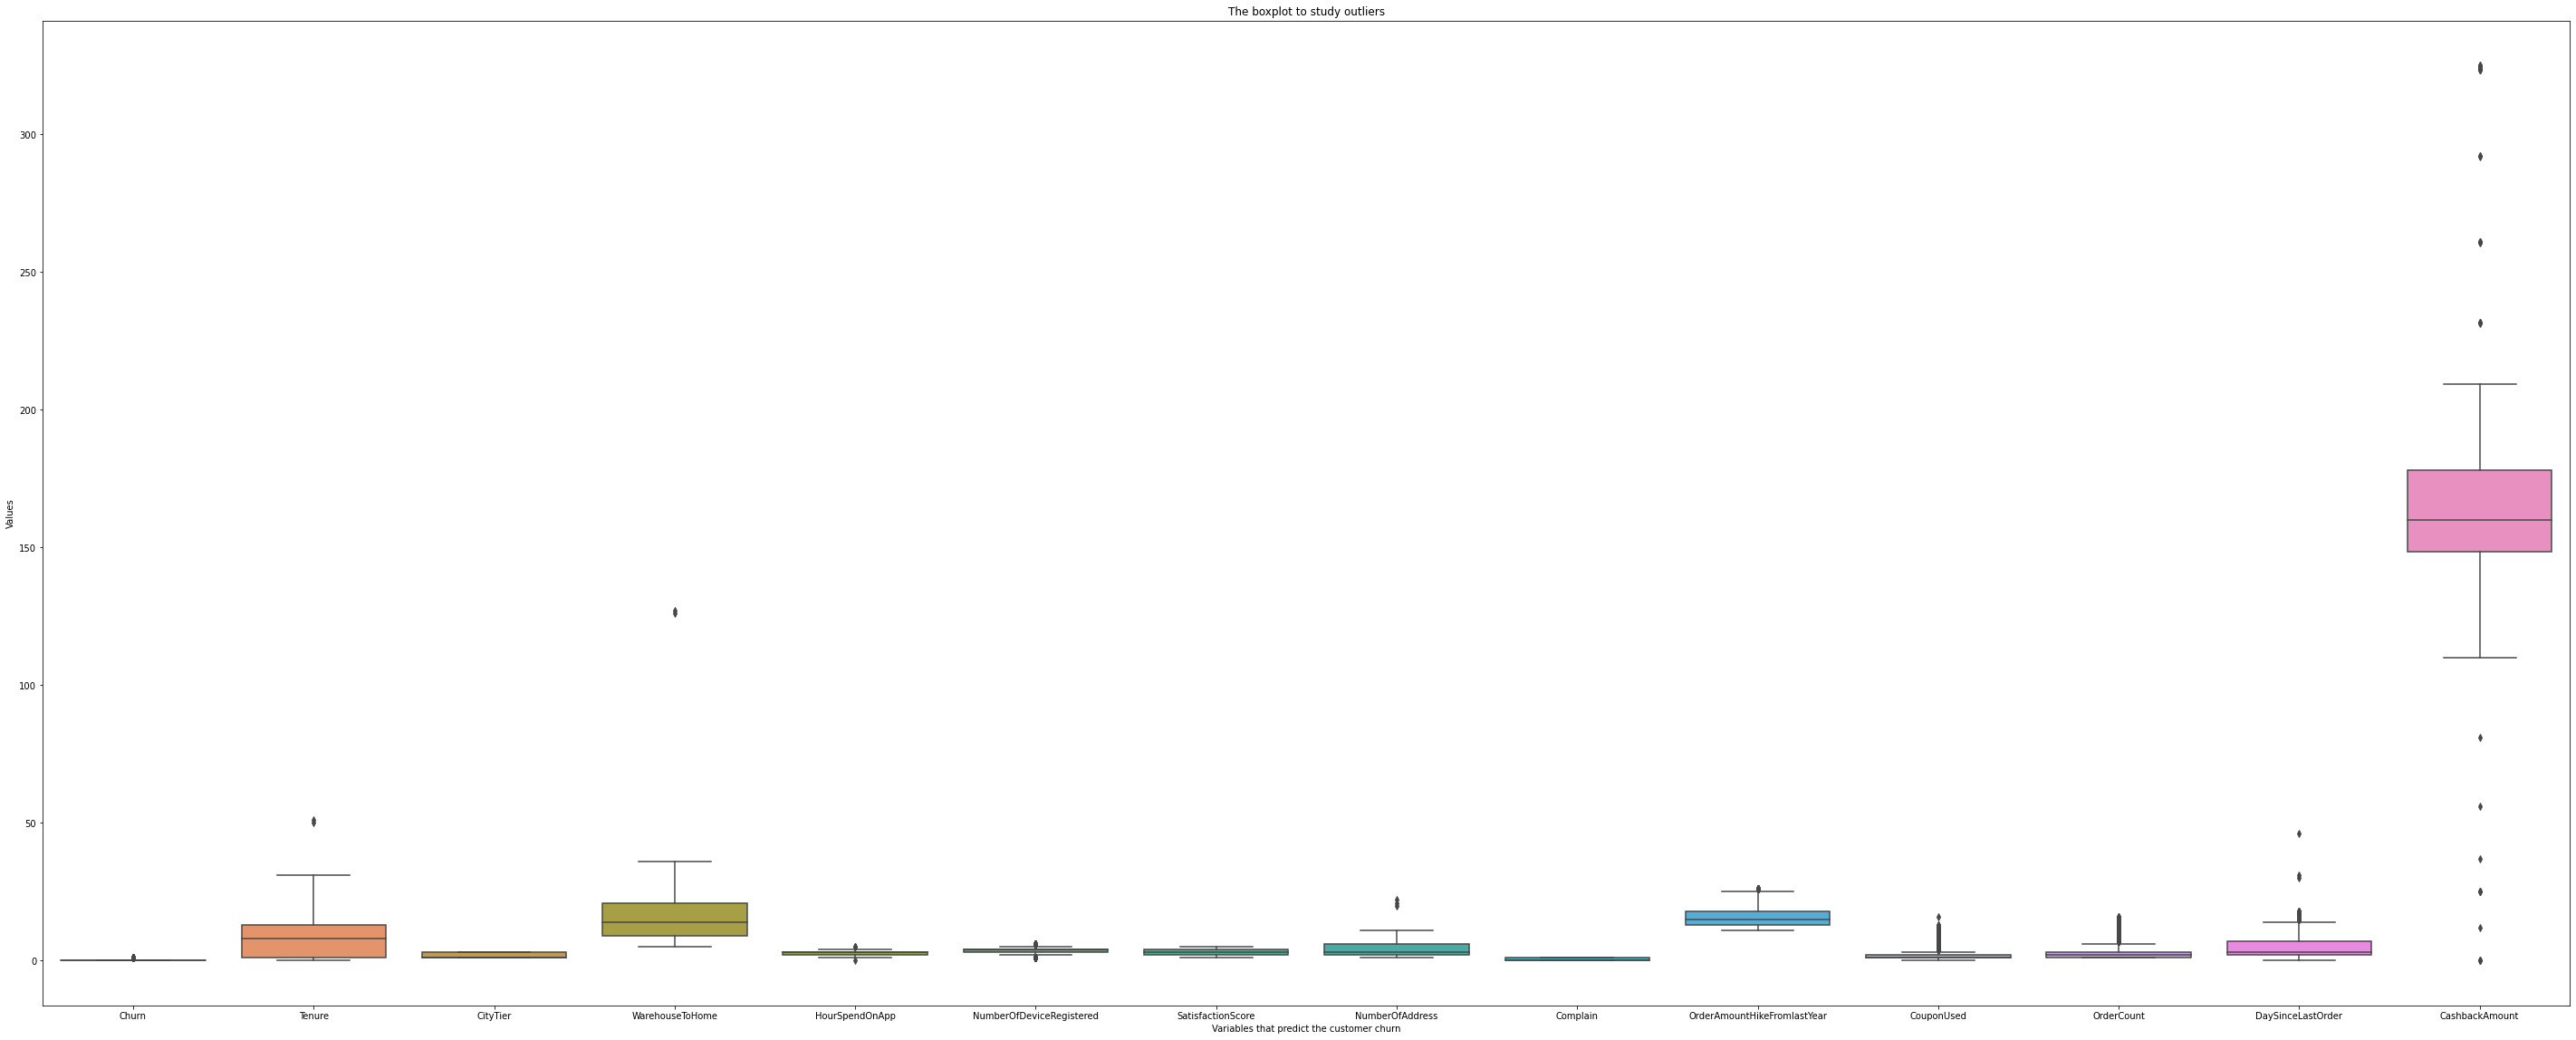

In [14]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [15]:
# заменим выборсы на соответсвующие значния верхнего и нижнего диапазона
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [16]:
for column in numbers:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

C:\Users\yakov\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0, 0.5, 'Values')

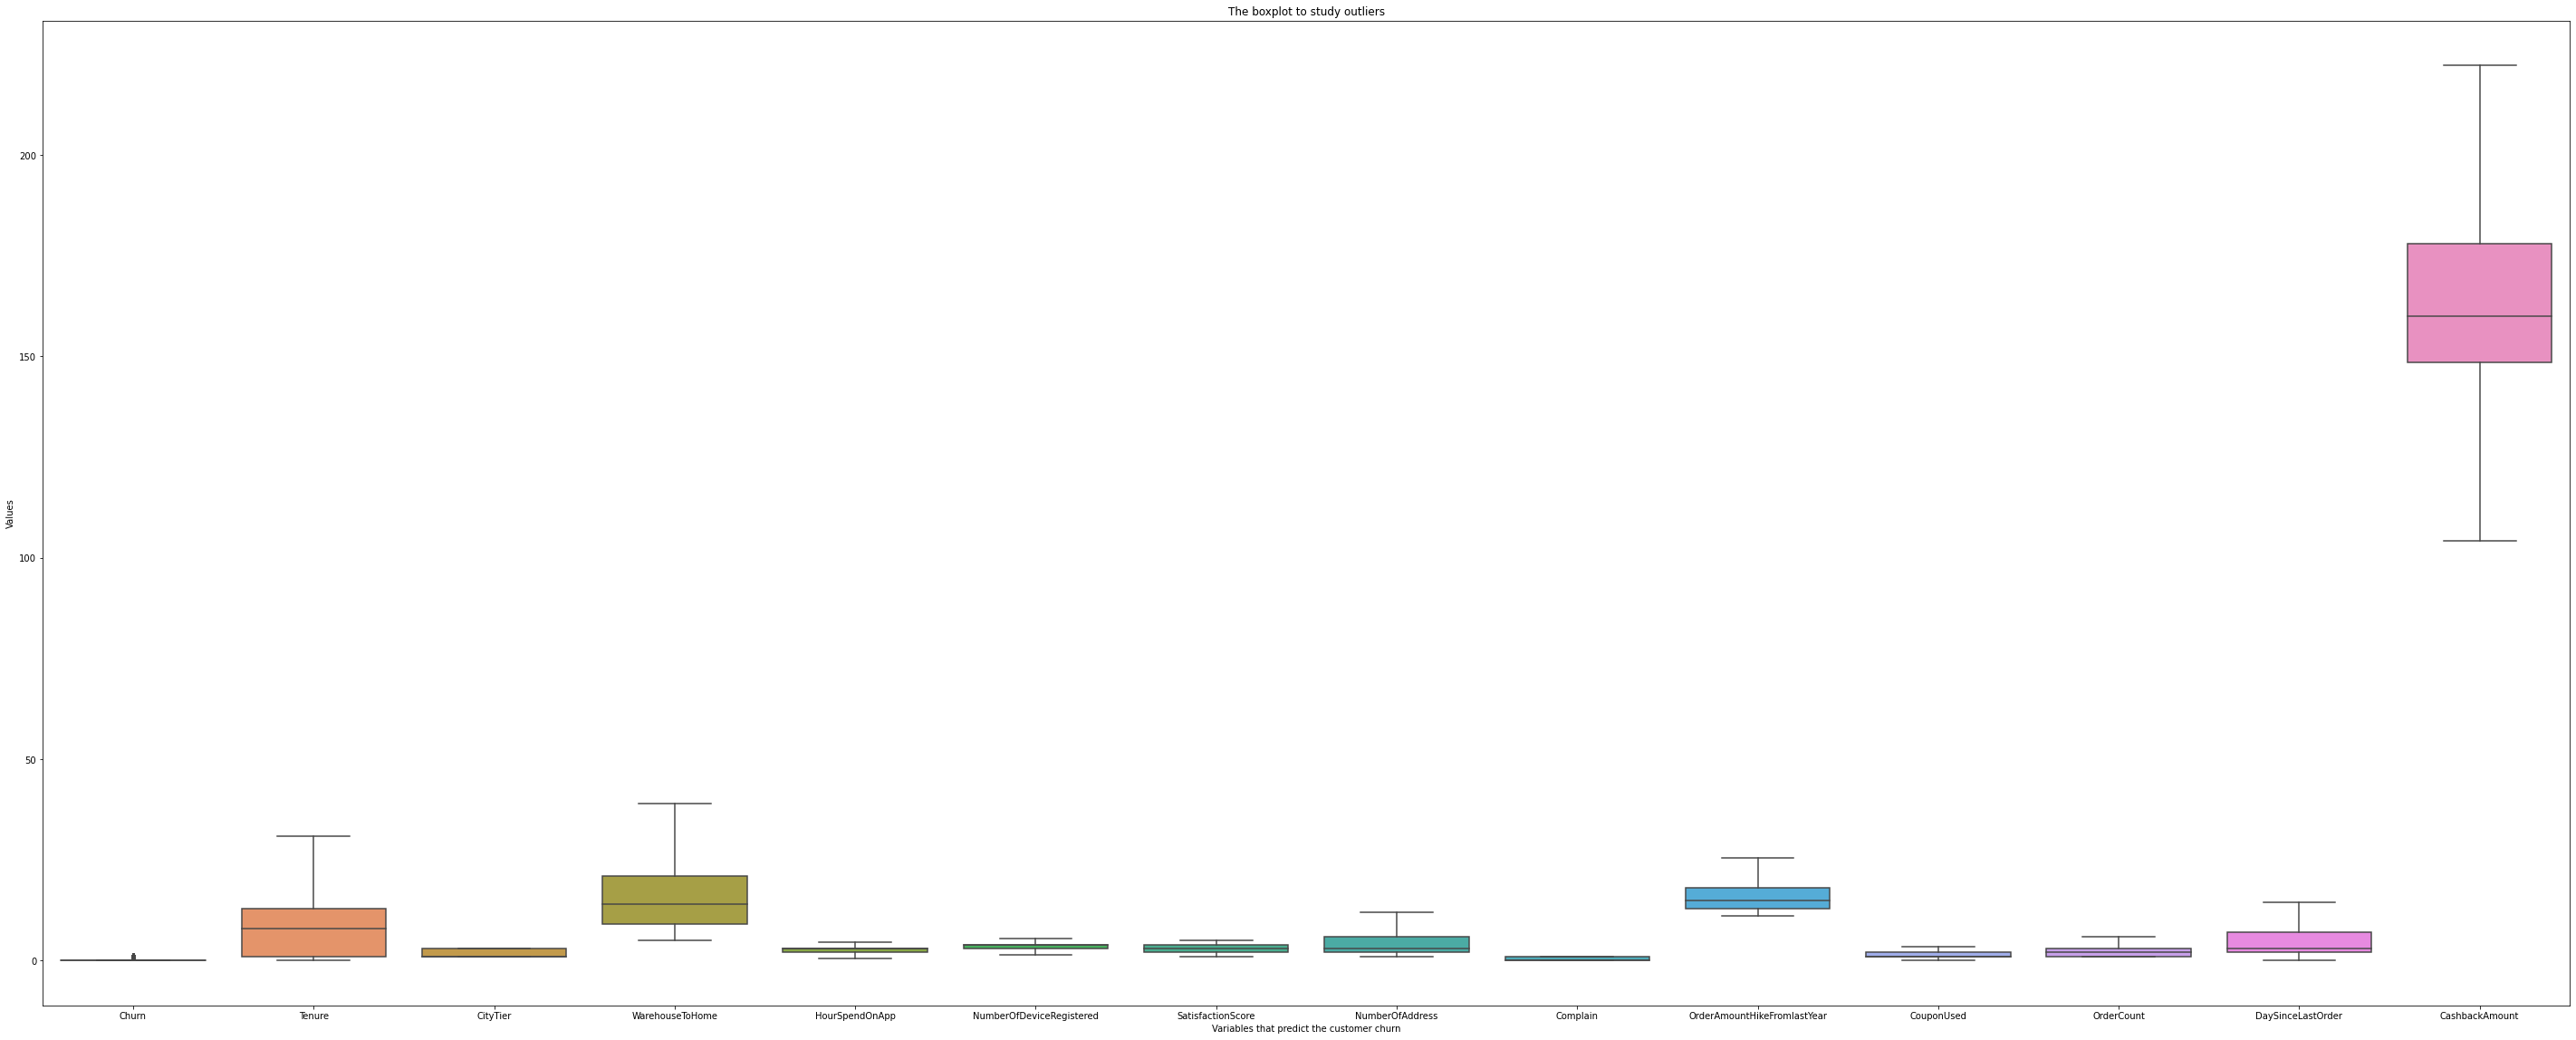

In [17]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Выбросов не осталось

In [18]:
df.shape

(3774, 19)

## Разведочный анализ данных

In [19]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [20]:
df[cat].describe().T

count unique                 top  freq
PreferredLoginDevice  3774      3        Mobile Phone  1936
CityTier              3774      3                   1  2368
PreferredPaymentMode  3774      7          Debit Card  1538
Gender                3774      2                Male  2271
PreferedOrderCat      3774      6  Laptop & Accessory  1961
MaritalStatus         3774      3             Married  1982

In [21]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

PreferredLoginDevice

Mobile Phone    1936
Computer        1111
Phone            727
Name: PreferredLoginDevice, dtype: int64


CityTier

1    2368
3    1265
2     141
Name: CityTier, dtype: int64


PreferredPaymentMode

Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: PreferredPaymentMode, dtype: int64


Gender

Male      2271
Female    1503
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     1982
Single      1245
Divorced     547
Name: MaritalStatus, dtype: int64




In [22]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
# так как Phone и Mobile Phone по сути одно и то же - соединим в одну категорию переменной

In [23]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2663
Computer        1111
Name: PreferredLoginDevice, dtype: int64

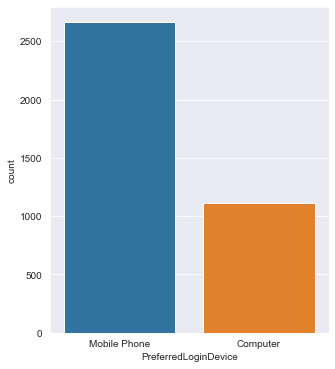

In [24]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = df);

Видно, что большинство пользователей пользуются сайтом с мобильного девайса

In [25]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # аналогично соединим одинаковые категории в одну
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [26]:
df['PreferredPaymentMode'].value_counts()

Debit Card          1538
Credit Card         1159
E wallet             443
Cash on Delivery     349
UPI                  285
Name: PreferredPaymentMode, dtype: int64

In [27]:
df1  =df['PreferredPaymentMode'].value_counts().reset_index()
df1.columns = ['mode', 'count']
df1

import plotly.express as px
fig = px.treemap(df1, path = ['mode'],
                 values = 'count') 
fig.show()

Большинство пользователей используют карты для оплаты в магазине

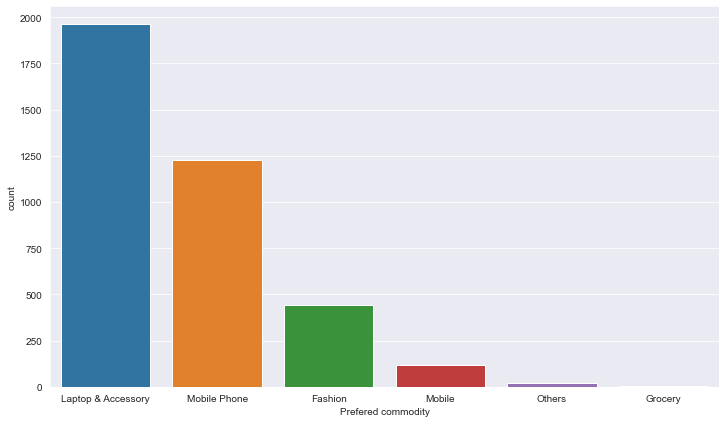

In [28]:
plt.figure(figsize = (12,7))
sns.countplot(x ='PreferedOrderCat', data = df,
              order = df['PreferedOrderCat'].value_counts().index) 
plt.xlabel('Prefered commodity');

Две самых популярных категории для покупки - техника

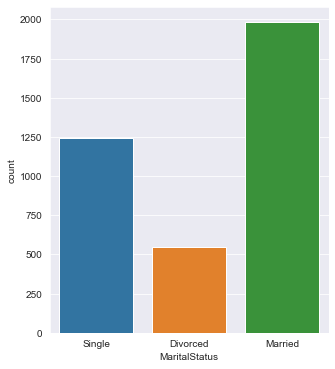

In [30]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'MaritalStatus',  data = df);

Большинство клиентов состоят в браке, меньшая доля разведённых людей

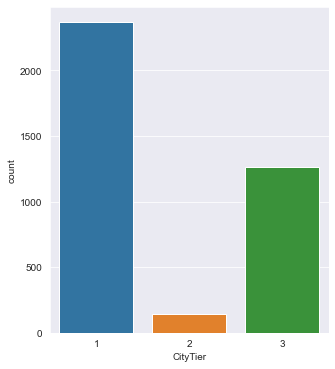

In [32]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'CityTier',  data = df);

Большинство покупателей из City Tier 1

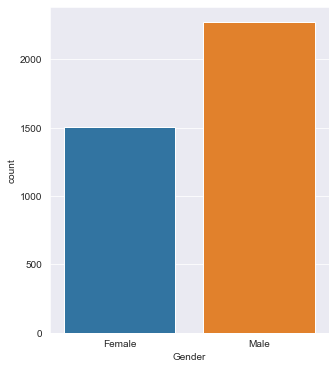

In [34]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'Gender',  data = df);

Большинство - мужчины

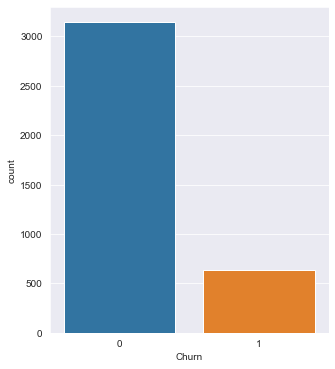

In [62]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'Churn',  data = df);

In [37]:
df['Churn'].value_counts().to_frame()

Churn
0   3143
1    631

631 пользователей под флагом оттока

Посмотриим на распределения нумерических переменных:

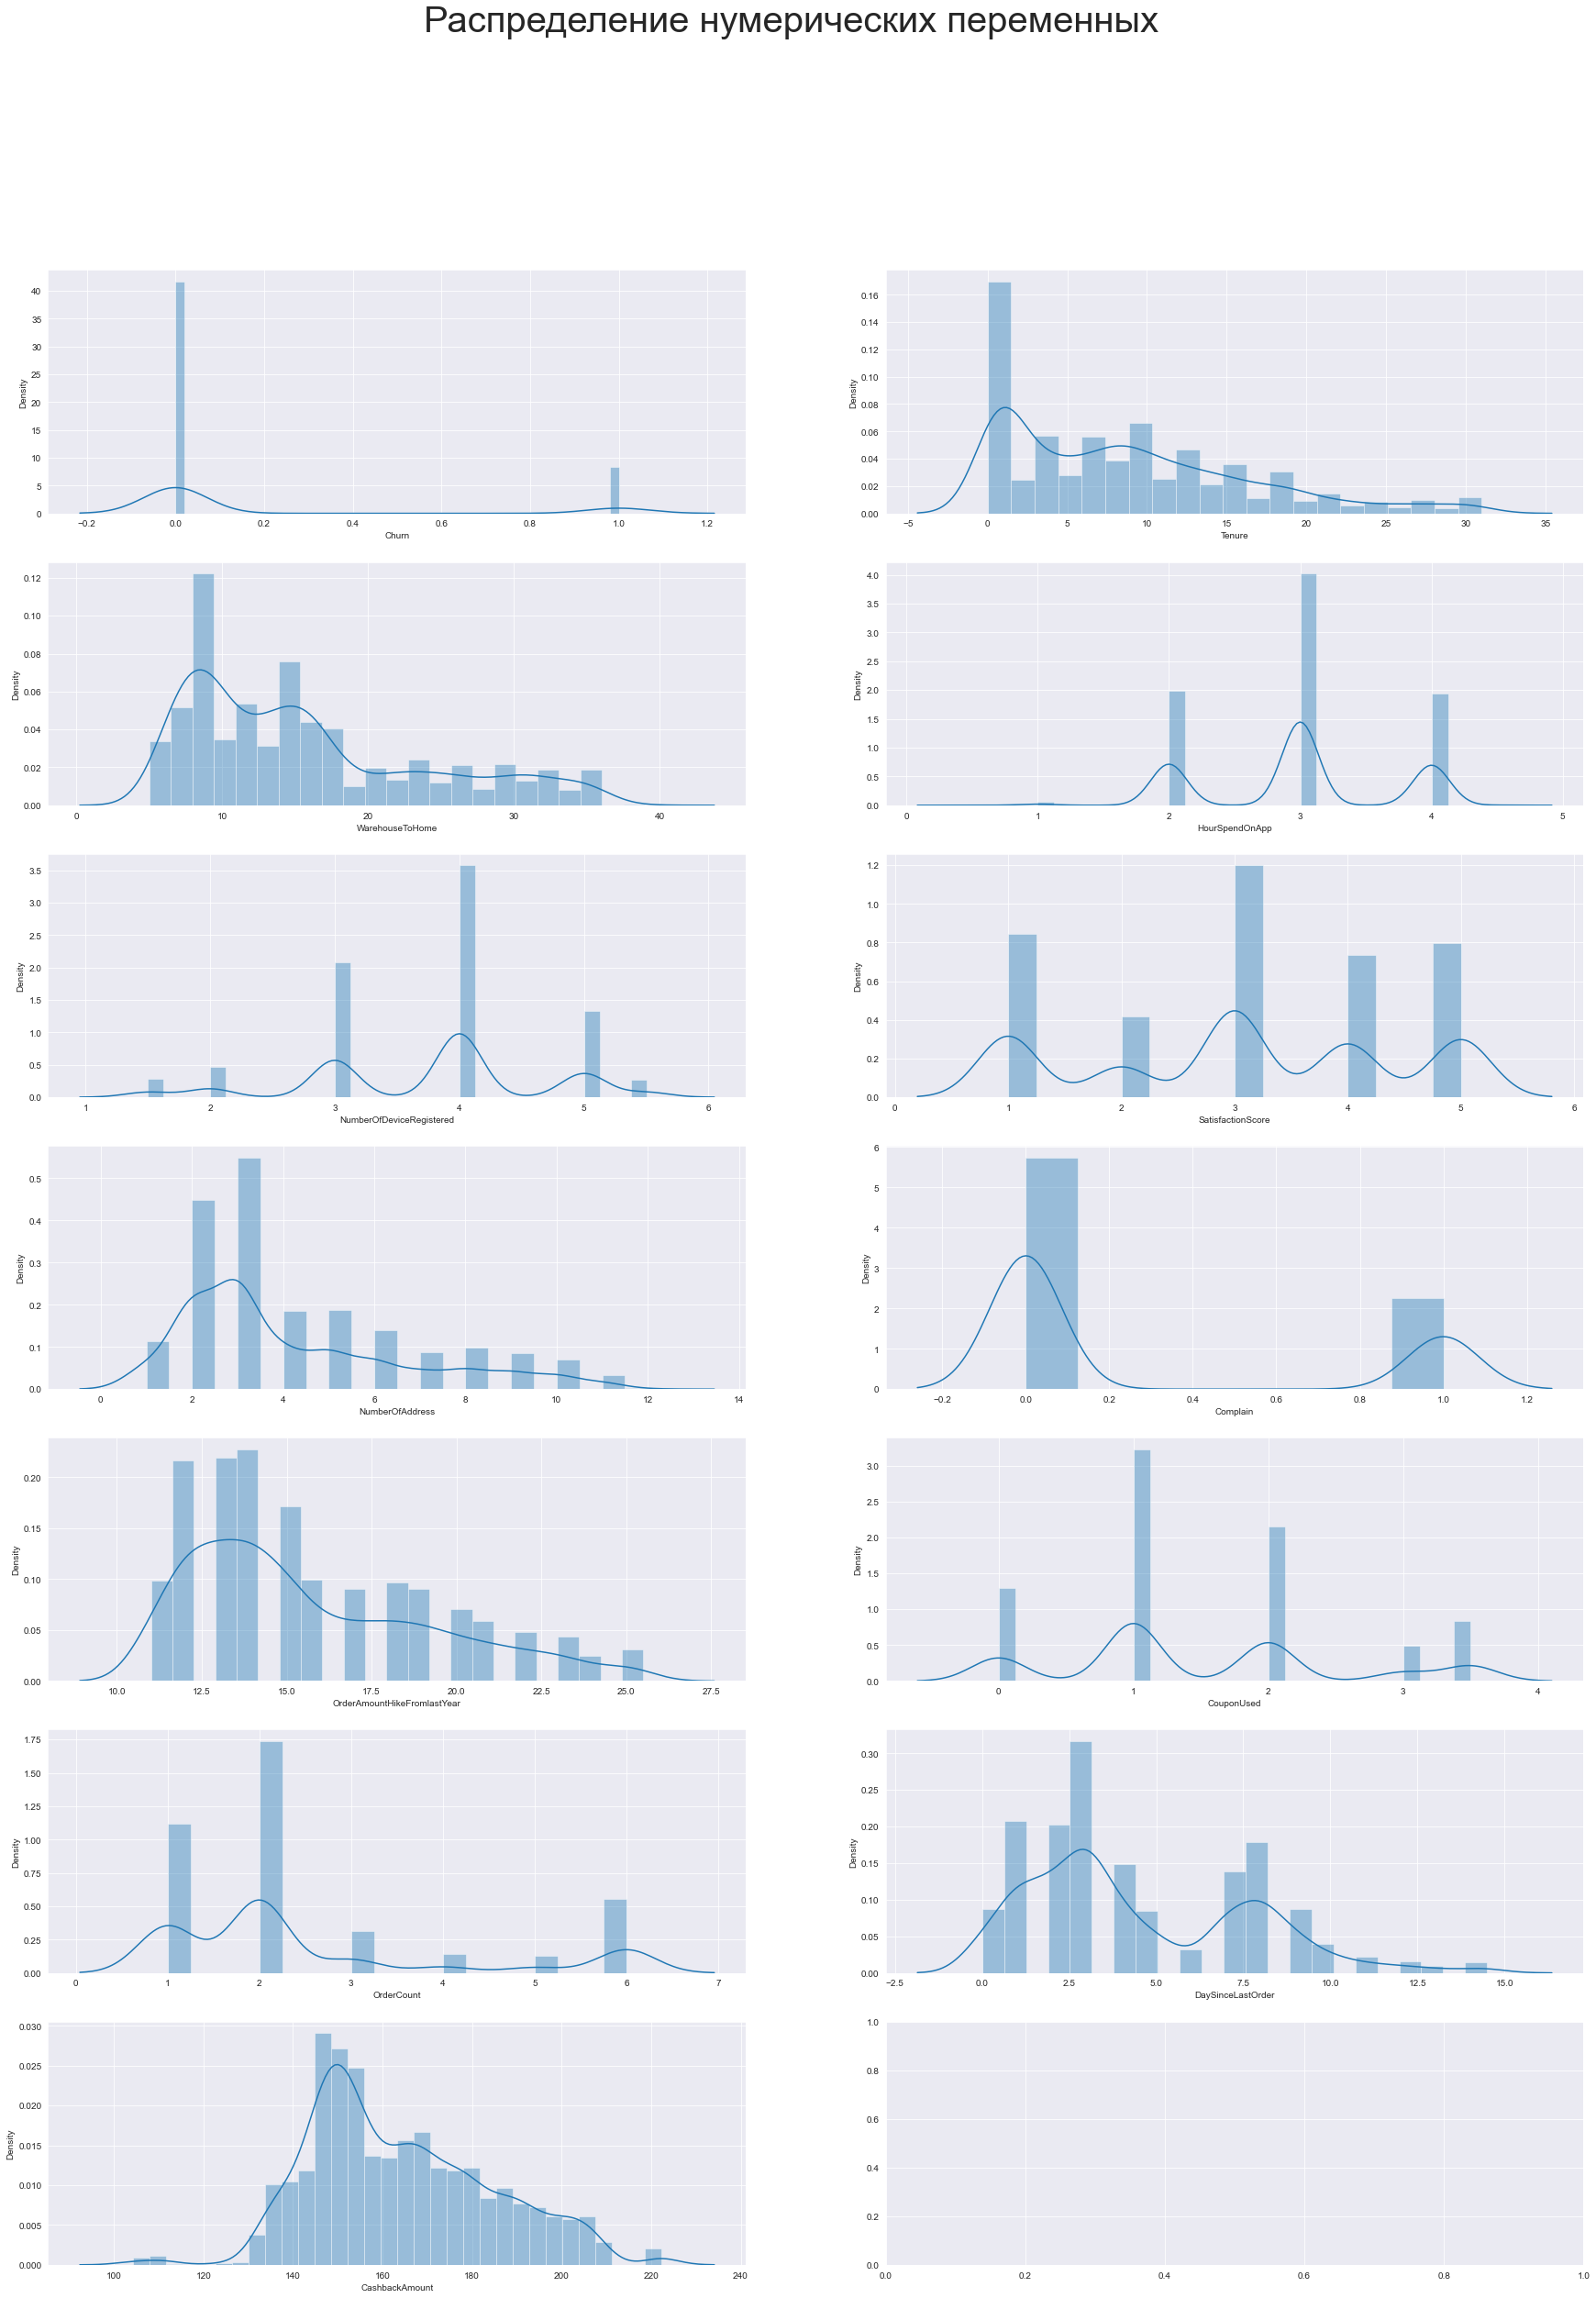

In [41]:
fig, ax = plt.subplots(7, 2, figsize=(30, 40))
fig.suptitle('Распределение нумерических переменных', fontsize=40)
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

In [42]:
num1 =  [ 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
         'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 
         'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


А также на распределения переменных в зависимости от Churn

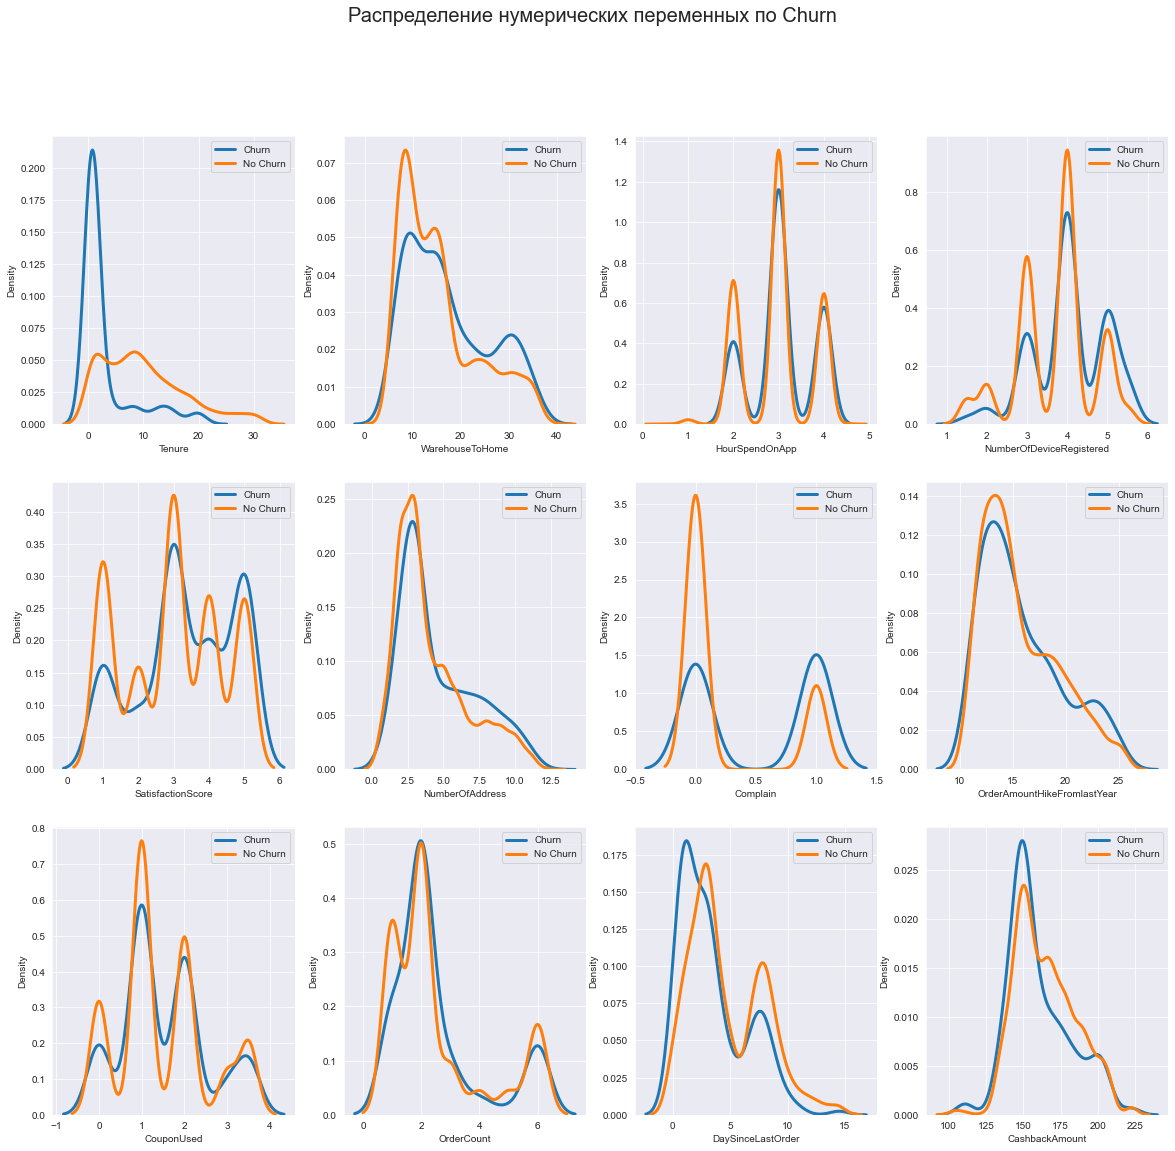

In [43]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(3,4,figsize=(20, 18))
fig.suptitle('Распределение нумерических переменных по Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num1):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])
    
    ax[idx].legend(loc='upper right')

plt.show()

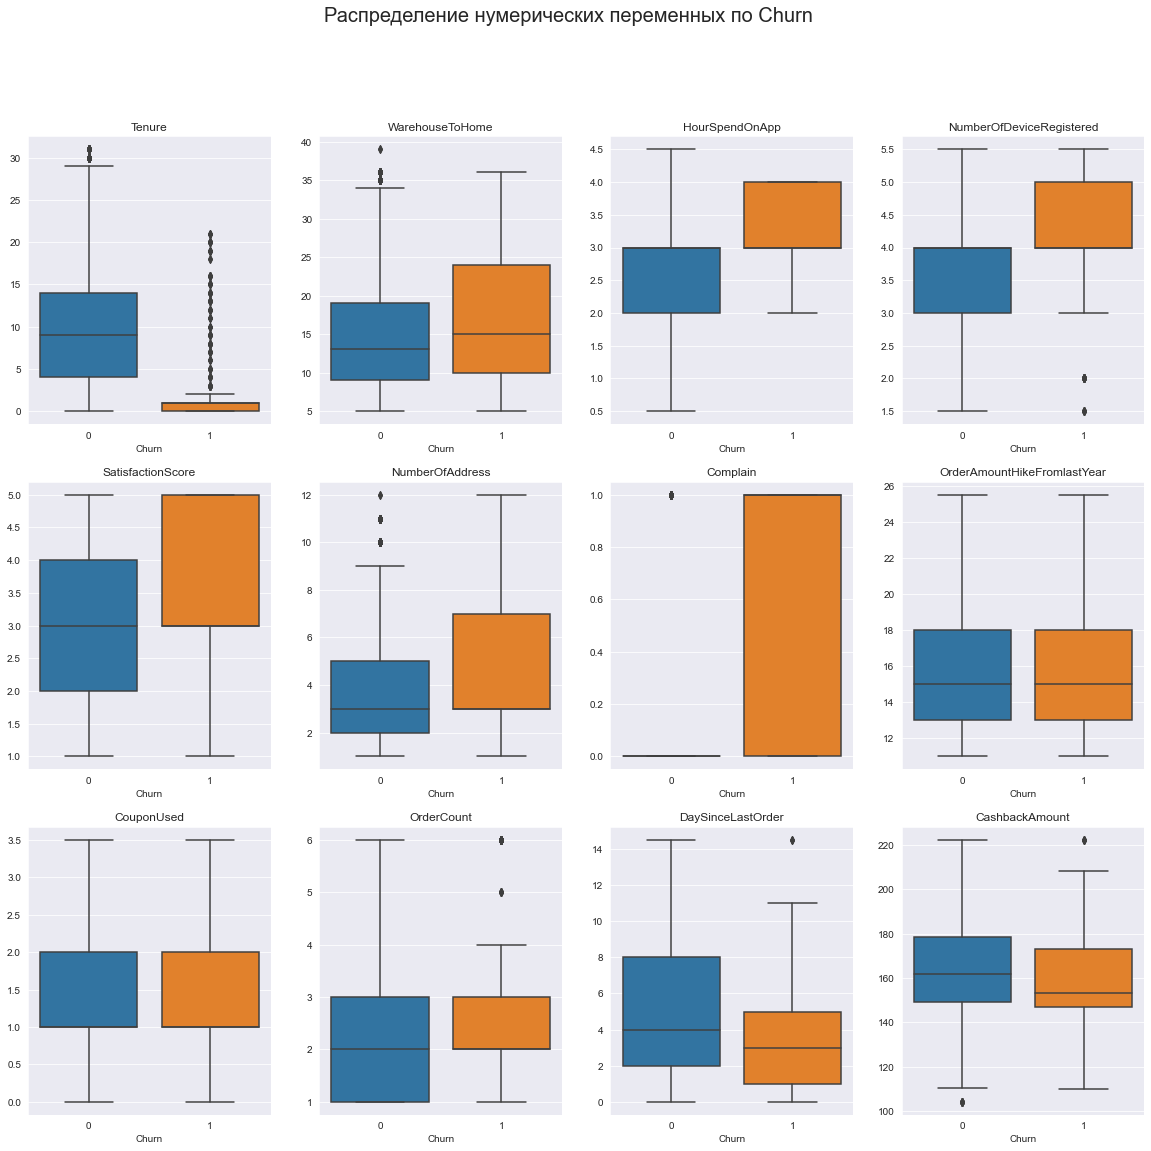

In [44]:
fig, ax = plt.subplots(3,4,figsize=(20, 18))
fig.suptitle('Распределение нумерических переменных по Churn', fontsize=20)
ax = ax.flatten()
for idx,c in enumerate(num1):
    df_t = df[df[c].notnull()].copy()
    ax[idx].set_title(c) 
    sns.boxplot(x='Churn', y=c, data=df_t, ax=ax[idx])
    ax[idx].set_ylabel('')
plt.show()

Можно сделать вывод, что пользователи из класса Churn:

меньше времени взаимодействуют с компанией, 

расстояние от склада до дома клиента больше

чаще оставляют жалобу

В остальном распределения очень похожи

In [45]:
cat1 = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus',  'Complain']

In [46]:
import plotly.express as px

for feature in cat1:
    fig = px.histogram(df, x=feature,color="Churn",barnorm = 'percent')
    fig.show()

Процент оттока чуть больше у пользователей, использующих компьютер, живущих в 3 City Tier, одиноких и предпочитающих категорию мобильные телефоны, а также среди людей, оставивиших жалобу.

## Тестрирование гипотез

Протестируем гипотезу о том, что отток не заивит от пола с помощью критерия Хи-квадрат

In [47]:
import scipy.stats

ct_o = df.groupby('Gender')['Churn'].value_counts().unstack()
ct_o

Churn      0    1
Gender           
Female  1275  228
Male    1868  403

In [48]:
scipy.stats.chi2_contingency(ct_o, correction=False)

(4.309603138791943,
 0.03789780176235643,
 1,
 array([[1251.70349762,  251.29650238],
        [1891.29650238,  379.70349762]]))

In [49]:
chi_square = 4.309603138791943 
alpha = 0.01
critical_value = 6.63

In [50]:
chi_square > critical_value

False

Значение критерия не превышает критического - 0 гипотеза не отвергается

Проверим 0 гипотезу о том, что нет разницы по кешбеку для группы оттока и группы не-оттока

In [51]:
churn = df[df['Churn'] == 1]["CashbackAmount"]
no_churn = df[df['Churn'] == 0]["CashbackAmount"]

In [54]:
scipy.stats.ttest_ind(no_churn, churn, equal_var=False)

Ttest_indResult(statistic=4.673020121094868, pvalue=3.432552909560121e-06)

In [55]:
p_value = scipy.stats.ttest_ind(no_churn, churn, equal_var=False)[-1]

In [56]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667

In [57]:
hypothesis_check(p_value, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


Посмотрии на корреляции между переменными:

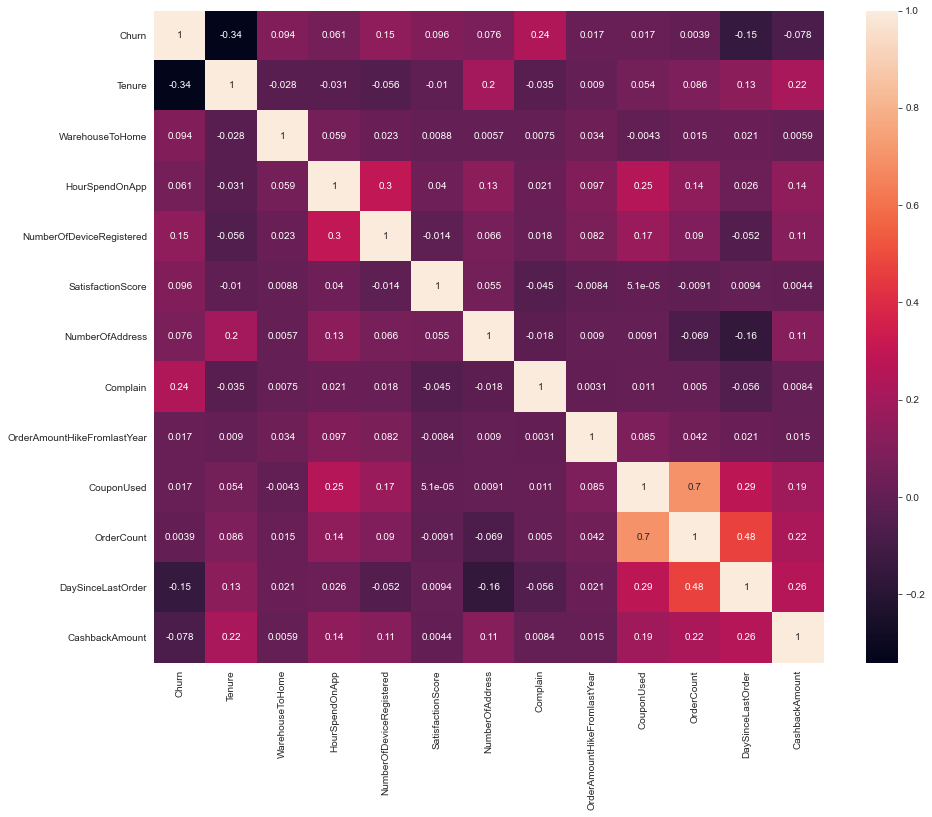

In [58]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

Можно отметить, что флаг оттока имеет значительную отрицательную корреляцию с Tenure,  а также положительную корреляцию с начличием жалобы

## Linear regression

Определим, от чего зависит срок пребывания клиента в организации. Для этого построим линейную регрессию для нумерических переменных.

In [66]:
import statsmodels.api as sm
factors = ['CashbackAmount','SatisfactionScore', 'HourSpendOnApp',  'WarehouseToHome', 'NumberOfDeviceRegistered',  'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

X_mult = df[factors]
y = df['Tenure']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     40.07
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.29e-82
Time:                        19:20:37   Log-Likelihood:                -12817.
No. Observations:                3774   AIC:                         2.566e+04
Df Residuals:                    3762   BIC:                         2.573e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Видно, что среди значимых переменных положительный эффект на длительность пребывания оказывает количество кешбека, количество адресов и количество дней с момента последнего заказа. Отрицательный эффект оказывают количество времени, проведённое в приложении, расстояние от склада до дома ( на уровне значимости 10%), количество зарегестрированных девайсов. R^2 модели составляет всего 10%, а также возможна проблема мультиколлиниарности, однако исключение некоторых переменнвх с сильной корреляцией (например, coupon used),  не увеличивает качество модели.

## Препроцессинг данных: создание дамми для категориальных переменных и скалирование переменных 

In [69]:
df.head()

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0       1     4.0         Mobile Phone        3              6.0   
3       1     0.0         Mobile Phone        3             15.0   
5       1     0.0             Computer        1             22.0   
11      1    11.0         Mobile Phone        1              6.0   
12      1     0.0         Mobile Phone        1             11.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female             3.0                       3.0   
3            Debit Card    Male             2.0                       4.0   
5            Debit Card  Female             3.0                       5.0   
11           Debit Card    Male             3.0                       4.0   
12     Cash on Delivery    Male             2.0                       3.0   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                2.0        Single              9.0   
3   Laptop & Accessory                5.0        Single              8.0   
5         Mobile Phone                5.0        Single              2.0   
11             Fashion                3.0        Single             10.0   
12              Mobile                3.0        Single              2.0   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                         11.0         1.0         1.0   
3          0                         23.0         0.0         1.0   
5          1                         22.0         3.5         6.0   
11         1                         13.0         0.0         1.0   
12         1                         13.0         2.0         2.0   

    DaySinceLastOrder  CashbackAmount  
0                 5.0          159.93  
3                 3.0          134.07  
5                 7.0          139.19  
11                0.0          153.81  
12                2.0          134.41

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[num1])
df[num1] = scaler.transform(df[num1])

In [73]:
df[num1]

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     0.129032         0.029412           0.625                     0.375   
3     0.000000         0.294118           0.375                     0.625   
5     0.000000         0.500000           0.625                     0.875   
11    0.354839         0.029412           0.625                     0.625   
12    0.000000         0.176471           0.375                     0.375   
...        ...              ...             ...                       ...   
5624  0.032258         0.205882           0.375                     0.875   
5625  0.322581         0.735294           0.625                     0.125   
5627  0.032258         0.176471           0.625                     0.125   
5628  0.741935         0.117647           0.875                     0.875   
5629  0.258065         0.294118           0.625                     0.125   

      SatisfactionScore  NumberOfAddress  Complain  \
0                  0.25         0.727273       1.0   
3                  1.00         0.636364       0.0   
5                  1.00         0.090909       1.0   
11                 0.50         0.818182       1.0   
12                 0.50         0.090909       1.0   
...                 ...              ...       ...   
5624               0.50         0.090909       0.0   
5625               0.00         0.454545       0.0   
5627               0.75         0.181818       1.0   
5628               0.75         0.272727       0.0   
5629               0.50         0.272727       0.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                        0.000000    0.285714         0.0           0.344828   
3                        0.827586    0.000000         0.0           0.206897   
5                        0.758621    1.000000         1.0           0.482759   
11                       0.137931    0.000000         0.0           0.000000   
12                       0.137931    0.571429         0.2           0.137931   
...                           ...         ...         ...                ...   
5624                     0.551724    0.571429         0.2           0.068966   
5625                     0.482759    0.285714         0.2           0.275862   
5627                     0.689655    0.285714         0.2           0.275862   
5628                     0.275862    0.571429         0.2           0.620690   
5629                     0.137931    0.571429         0.2           0.206897   

      CashbackAmount  
0           0.471909  
3           0.252942  
5           0.296296  
11          0.420089  
12          0.255821  
...              ...  
5624        0.427286  
5625        0.393840  
5627        0.696211  
5628        0.632536  
5629        0.549047  

[3774 rows x 12 columns]

In [80]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False, drop='first')
encoder.fit(df[cat])
encoded_cols = list(encoder.get_feature_names(cat))
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[cat])

['PreferredLoginDevice_Mobile Phone', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [81]:
df[encoded_cols]

PreferredLoginDevice_Mobile Phone  CityTier_2  CityTier_3  \
0                                   1.0         0.0         1.0   
3                                   1.0         0.0         1.0   
5                                   0.0         0.0         0.0   
11                                  1.0         0.0         0.0   
12                                  1.0         0.0         0.0   
...                                 ...         ...         ...   
5624                                1.0         0.0         1.0   
5625                                0.0         0.0         0.0   
5627                                1.0         0.0         0.0   
5628                                0.0         0.0         1.0   
5629                                1.0         0.0         0.0   

      PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                                  0.0                              1.0   
3                                  0.0                              1.0   
5                                  0.0                              1.0   
11                                 0.0                              1.0   
12                                 0.0                              0.0   
...                                ...                              ...   
5624                               0.0                              0.0   
5625                               1.0                              0.0   
5627                               0.0                              1.0   
5628                               1.0                              0.0   
5629                               1.0                              0.0   

      PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                               0.0                       0.0          0.0   
3                               0.0                       0.0          1.0   
5                               0.0                       0.0          0.0   
11                              0.0                       0.0          1.0   
12                              0.0                       0.0          1.0   
...                             ...                       ...          ...   
5624                            0.0                       1.0          0.0   
5625                            0.0                       0.0          1.0   
5627                            0.0                       0.0          1.0   
5628                            0.0                       0.0          1.0   
5629                            0.0                       0.0          1.0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0.0                                  1.0   
3                          0.0                                  1.0   
5                          0.0                                  0.0   
11                         0.0                                  0.0   
12                         0.0                                  0.0   
...                        ...                                  ...   
5624                       0.0                                  0.0   
5625                       0.0                                  1.0   
5627                       0.0                                  1.0   
5628                       0.0                                  1.0   
5629                       0.0                                  1.0   

      PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0.0                            0.0   
3                         0.0                            0.0   
5                         0.0                            1.0   
11                        0.0                            0.0   
12                        1.0                            0.0   
...                       ...                            ...   
5624                      0.0                            1.0  

In [82]:
X = df[num1 + encoded_cols]
X 

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     0.129032         0.029412           0.625                     0.375   
3     0.000000         0.294118           0.375                     0.625   
5     0.000000         0.500000           0.625                     0.875   
11    0.354839         0.029412           0.625                     0.625   
12    0.000000         0.176471           0.375                     0.375   
...        ...              ...             ...                       ...   
5624  0.032258         0.205882           0.375                     0.875   
5625  0.322581         0.735294           0.625                     0.125   
5627  0.032258         0.176471           0.625                     0.125   
5628  0.741935         0.117647           0.875                     0.875   
5629  0.258065         0.294118           0.625                     0.125   

      SatisfactionScore  NumberOfAddress  Complain  \
0                  0.25         0.727273       1.0   
3                  1.00         0.636364       0.0   
5                  1.00         0.090909       1.0   
11                 0.50         0.818182       1.0   
12                 0.50         0.090909       1.0   
...                 ...              ...       ...   
5624               0.50         0.090909       0.0   
5625               0.00         0.454545       0.0   
5627               0.75         0.181818       1.0   
5628               0.75         0.272727       0.0   
5629               0.50         0.272727       0.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  ...  \
0                        0.000000    0.285714         0.0  ...   
3                        0.827586    0.000000         0.0  ...   
5                        0.758621    1.000000         1.0  ...   
11                       0.137931    0.000000         0.0  ...   
12                       0.137931    0.571429         0.2  ...   
...                           ...         ...         ...  ...   
5624                     0.551724    0.571429         0.2  ...   
5625                     0.482759    0.285714         0.2  ...   
5627                     0.689655    0.285714         0.2  ...   
5628                     0.275862    0.571429         0.2  ...   
5629                     0.137931    0.571429         0.2  ...   

      PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                               0.0                       0.0          0.0   
3                               0.0                       0.0          1.0   
5                               0.0                       0.0          0.0   
11                              0.0                       0.0          1.0   
12                              0.0                       0.0          1.0   
...                             ...                       ...          ...   
5624                            0.0                       1.0          0.0   
5625                            0.0                       0.0          1.0   
5627                            0.0                       0.0          1.0   
5628                            0.0                       0.0          1.0   
5629                            0.0                       0.0          1.0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0.0                                  1.0   
3                          0.0                                  1.0   
5                          0.0                                  0.0   
11                         0.0                                  0.0   
12                         0.0                                  0.0   
...                        ...                                  ...   
5624                       0.0                                  0.0   
5625                       0.0                                  1.0   
5627                       0.0                                  1

In [79]:
import statsmodels.api as sm
factors = ['CashbackAmount','SatisfactionScore', 'HourSpendOnApp',  'WarehouseToHome', 'NumberOfDeviceRegistered',  'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'PreferredLoginDevice_Mobile Phone', 'CityTier_3','PreferredPaymentMode_Credit Card', 'Gender_Male', 'PreferedOrderCat_Mobile', 'MaritalStatus_Married', 'MaritalStatus_Single' ]

X_mult = X[factors]
y = X['Tenure']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     29.73
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           5.46e-95
Time:                        19:41:44   Log-Likelihood:                 184.97
No. Observations:                3774   AIC:                            -331.9
Df Residuals:                    3755   BIC:                            -213.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Добавление дамми-переменных немного повысило качество модели. 

In [84]:
y = df[['Churn']]     # датасет с целевой переменной
y

Churn
0         1
3         1
5         1
11        1
12        1
...     ...
5624      0
5625      0
5627      0
5628      0
5629      0

[3774 rows x 1 columns]

## Создание train и test выборки

Так как целевая переменная распределена по категориями неравномерно (отток 17%), для того, чтобы пропрорция сохранялась в выборках используем StratifiedShuffleSplit

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, random_state = 0) 

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.18, stratify = y, shuffle = True, random_state = 2)
# пропрорция тестовой выборки - 18%

In [87]:
y_train

Churn
4761      0
1745      0
1277      0
4453      1
2545      0
...     ...
2071      0
4117      0
5474      0
3351      0
4839      0

[3094 rows x 1 columns]

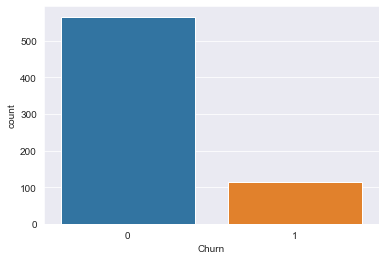

Churn
0    566
1    114
dtype: int64

In [88]:
# Проверим тестовую выборку

sns.countplot(data=y_test, x='Churn')
plt.show()

y_test.groupby('Churn').size()

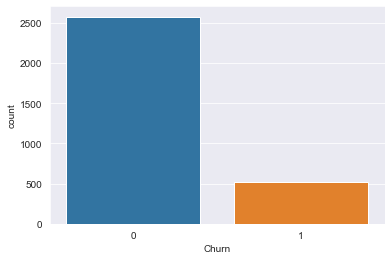

Churn
0    2577
1     517
dtype: int64

In [89]:
# Проверим выборку для обучения

sns.countplot(data=y_train, x='Churn')
plt.show()

y_train.groupby('Churn').size()

## Logistic Regression

In [90]:
y_test_new= np.ravel(y_test)
y_train_new=np.ravel(y_train)   
#Устраняем такую ошибку - A column-vector y was passed when a 1d array was expected. 
#Please change the shape of y to (n_samples, ), for example using ravel().

In [91]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
logit = log_reg.fit(X_train,y_train_new)
logit_pred = logit.predict(X_test)

Метрики качества

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, logit_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.72      0.41      0.53       114

    accuracy                           0.88       680
   macro avg       0.81      0.69      0.73       680
weighted avg       0.86      0.88      0.86       680



In [93]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_new, logit_pred))

[[548  18]
 [ 67  47]]


In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_new, logit_pred)

0.6902392908065216

Посмотрим на коэффициенты регресии. Можно отметить, что увеличение таких факторов как расстояние от дома до склада, количества зарегестрированных девайсов, оценки качества, количества адресов, наличие жалобы, процентного увеличения заказа по сравнению с прошлым годом, увеличения общего количества заказов, нахождение в City Tier 2 и 3, платеж с помощью электронного кошелька, мужской пол, отсутствие отношений и предпочитаемая категория other - всё это ялвяется факторами для увеличения вероятности оттока покупателя.

In [95]:
print(logit.coef_, logit.intercept_)

[[-6.14830942  1.4773039  -0.03937615  1.43112854  1.09167631  2.22507392
   1.62644573  0.03911993 -0.19434316  1.16626157 -1.53223642 -0.46894981
  -0.30041973  0.68050204  0.73610481 -0.46221582 -0.3167948   0.02402365
  -0.44266022  0.31135271 -0.04336405 -1.58712117 -0.20080579 -0.48891497
   0.97285797 -0.3802176   0.74976967]] [-2.5036084]


In [96]:
pd.DataFrame(zip(X_train.columns, np.transpose(logit.coef_)), columns=['features', 'coef'])

features                    coef
0                                Tenure    [-6.148309418438853]
1                       WarehouseToHome    [1.4773039036041904]
2                        HourSpendOnApp  [-0.03937615478502424]
3              NumberOfDeviceRegistered    [1.4311285369705173]
4                     SatisfactionScore      [1.09167630516425]
5                       NumberOfAddress    [2.2250739215129904]
6                              Complain    [1.6264457334488602]
7           OrderAmountHikeFromlastYear  [0.039119927752540404]
8                            CouponUsed  [-0.19434315805176772]
9                            OrderCount    [1.1662615654918254]
10                    DaySinceLastOrder    [-1.532236423344462]
11                       CashbackAmount  [-0.46894980649344764]
12    PreferredLoginDevice_Mobile Phone   [-0.3004197252318989]
13                           CityTier_2    [0.6805020357063642]
14                           CityTier_3    [0.7361048089058332]
15     PreferredPaymentMode_Credit Card   [-0.4622158207024306]
16      PreferredPaymentMode_Debit Card   [-0.3167948006252512]
17        PreferredPaymentMode_E wallet  [0.024023650557665862]
18             PreferredPaymentMode_UPI   [-0.4426602163127136]
19                          Gender_Male   [0.31135271146777366]
20             PreferedOrderCat_Grocery  [-0.04336405256717284]
21  PreferedOrderCat_Laptop & Accessory   [-1.5871211680576893]
22              PreferedOrderCat_Mobile  [-0.20080579207678653]
23        PreferedOrderCat_Mobile Phone   [-0.4889149688379469]
24              PreferedOrderCat_Others    [0.9728579748573568]
25                MaritalStatus_Married    [-0.380217596620222]
26                 MaritalStatus_Single    [0.7497696734379824]

Подберём гиперпараметры:

In [97]:
from sklearn.pipeline import Pipeline
pipe_log = Pipeline([
    ('clf', LogisticRegression())
])
pipe_log.steps

[('clf', LogisticRegression())]

In [98]:
params_log = {'clf__C': np.logspace(-5, 8, 15),  'clf__penalty':['l1', 'l2']}

In [99]:
from sklearn.model_selection import GridSearchCV
cv_log = GridSearchCV(pipe_log, param_grid=params_log,
                      cv=cv, scoring='roc_auc')

In [100]:
cv_log.fit(X_train, y_train_new)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'clf__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [101]:
results_log = pd.DataFrame(cv_log.cv_results_).sort_values(by='rank_test_score')
results_log.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.052712      0.008117         0.002248        0.000503   
21       0.054211      0.006008         0.002187        0.000384   
29       0.057367      0.010514         0.002998        0.001090   
27       0.046819      0.003597         0.003597        0.000491   
15       0.047782      0.002680         0.003184        0.000977   

       param_clf__C param_clf__penalty  \
19      2275.845926                 l2   
21     19306.977289                 l2   
29      100000000.0                 l2   
27  11787686.347936                 l2   
15        31.622777                 l2   

                                               params  split0_test_score  \
19  {'clf__C': 2275.845926074791, 'clf__penalty': ...           0.884317   
21  {'clf__C': 19306.977288832535, 'clf__penalty':...           0.884317   
29      {'clf__C': 100000000.0, 'clf__penalty': 'l2'}           0.884317   
27  {'clf__C': 11787686.347935867, 'clf__penalty':...           0.884317   
15  {'clf__C': 31.622776601683793, 'clf__penalty':...           0.884839   

    split1_test_score  split2_test_score  split3_test_score  \
19           0.917114           0.877385           0.922182   
21           0.917188           0.877087           0.922332   
29           0.917114           0.877311           0.922182   
27           0.917114           0.877236           0.922182   
15           0.916965           0.877013           0.922033   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
19           0.886702         0.897540        0.018379                1  
21           0.886628         0.897510        0.018509                2  
29           0.886553         0.897496        0.018413                3  
27           0.886553         0.897481        0.018429                4  
15           0.886553         0.897481        0.018334                5

In [102]:
test_score_log = results_log.iloc[0, :]['mean_test_score']
test_score_log

0.8975402504472271

In [103]:
logit_pred2 = cv_log.predict(X_test)

In [104]:
print(classification_report(y_test_new, logit_pred2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       566
           1       0.72      0.46      0.56       114

    accuracy                           0.88       680
   macro avg       0.81      0.71      0.75       680
weighted avg       0.87      0.88      0.87       680



In [105]:
print(cv_log.best_score_)

0.8975402504472271


In [106]:
print(cv_log.best_estimator_)

Pipeline(steps=[('clf', LogisticRegression(C=2275.845926074791))])


In [107]:
log_reg_best = LogisticRegression(C=2275.845926074791)
logit_best = log_reg_best.fit(X_train,y_train_new)
logit_pred_best = logit.predict(X_test)
print(classification_report(y_test_new, logit_pred_best))

roc_auc_score(y_test_new, logit_pred_best)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.72      0.41      0.53       114

    accuracy                           0.88       680
   macro avg       0.81      0.69      0.73       680
weighted avg       0.86      0.88      0.86       680



0.6902392908065216

In [108]:
print(confusion_matrix(y_test_new, logit_pred_best))

[[548  18]
 [ 67  47]]


## XGBoost Classifier

In [114]:
import xgboost  
from xgboost import XGBClassifier

xgbc = XGBClassifier()

In [115]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
params = { 'n_estimators': n_estimators,
               'max_depth': max_depth, 'booster': ['gbtree'] }
clf_xgbc = GridSearchCV(xgbc, params, cv=5, scoring='roc_auc', n_jobs=-1)
clf_xgbc.fit(X_train, y_train)
clf_xgbc.best_params_

[20:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'booster': 'gbtree', 'max_depth': 12, 'n_estimators': 100}

In [116]:
results_xgbc = pd.DataFrame(clf_xgbc.cv_results_).sort_values(by='rank_test_score')
results_xgbc.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
110       5.279181      0.467028         0.024163        0.006918   
111       7.313071      0.407189         0.028957        0.014735   
100       6.452900      0.564733         0.028574        0.008504   
112      10.576824      0.481584         0.022180        0.002617   
60        4.664821      0.249640         0.026778        0.007261   

    param_booster param_max_depth param_n_estimators  \
110        gbtree              12                100   
111        gbtree              12                200   
100        gbtree              11                100   
112        gbtree              12                300   
60         gbtree               7                100   

                                                params  split0_test_score  \
110  {'booster': 'gbtree', 'max_depth': 12, 'n_esti...           0.992681   
111  {'booster': 'gbtree', 'max_depth': 12, 'n_esti...           0.992587   
100  {'booster': 'gbtree', 'max_depth': 11, 'n_esti...           0.993396   
112  {'booster': 'gbtree', 'max_depth': 12, 'n_esti...           0.992305   
60   {'booster': 'gbtree', 'max_depth': 7, 'n_estim...           0.993829   

     split1_test_score  split2_test_score  split3_test_score  \
110           0.959603           0.961333           0.977147   
111           0.958964           0.959410           0.978342   
100           0.956311           0.956516           0.981665   
112           0.959396           0.957748           0.979089   
60            0.951080           0.962584           0.978846   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
110           0.986182         0.975389        0.013155                1  
111           0.986615         0.975184        0.013823                2  
100           0.987068         0.974991        0.015617                3  
112           0.986163         0.974940        0.014013                4  
60            0.987539         0.974776        0.015828                5

In [117]:
test_score_xgbc = results_xgbc.iloc[0, :]['mean_test_score']
test_score_xgbc

0.9753891881270237

In [118]:
print(clf_xgbc.best_score_)

0.9753891881270237


In [119]:
from sklearn.metrics import classification_report
xgbc_pred = clf_xgbc.predict(X_test)
print(classification_report(y_test, xgbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       566
           1       0.95      0.95      0.95       114

    accuracy                           0.98       680
   macro avg       0.97      0.97      0.97       680
weighted avg       0.98      0.98      0.98       680



In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, xgbc_pred))

[[560   6]
 [  6 108]]


In [123]:
#лучшая xgboost
params = { 'n_estimators' : [ 100],
               'max_depth' :[12], 'booster': ['gbtree']}
clf_xgbc_best = GridSearchCV(xgbc, params, cv=5, scoring='roc_auc', n_jobs=-1)
clf_xgbc_best.fit(X_train, y_train)

[20:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'max_depth': [12],
                         'n_estimators': [100]},
             scoring='roc_auc')

In [124]:
print(clf_xgbc_best.best_score_)

0.9753891881270237


In [125]:
xgbc_pred_best = clf_xgbc_best.predict(X_test)
print(classification_report(y_test, xgbc_pred_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       566
           1       0.95      0.95      0.95       114

    accuracy                           0.98       680
   macro avg       0.97      0.97      0.97       680
weighted avg       0.98      0.98      0.98       680



In [126]:
print(roc_auc_score(y_test, xgbc_pred_best))

print(confusion_matrix(y_test, xgbc_pred_best))

0.9683838571694253
[[560   6]
 [  6 108]]


## Support Vector Machines

In [127]:
from sklearn.svm import SVC

params = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'degree': np.arange(2,6), 'C': np.arange(1, 4)}

svm = SVC(class_weight='balanced', random_state=8, probability=True)

search_param_SVC = GridSearchCV(svm, param_grid = params, cv=cv, scoring = 'roc_auc', verbose=3)
search_param_SVC.fit(X_train, np.ravel(y_train))
search_param_SVC.cv_results_

print('Лучшая функция потерь:', search_param_SVC.best_estimator_, '\nЗначение метрики качества', search_param_SVC.best_score_ )

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ......C=1, degree=2, kernel=linear;, score=0.876 total time=   1.2s
[CV 2/5] END ......C=1, degree=2, kernel=linear;, score=0.914 total time=   0.9s
[CV 3/5] END ......C=1, degree=2, kernel=linear;, score=0.873 total time=   0.9s
[CV 4/5] END ......C=1, degree=2, kernel=linear;, score=0.919 total time=   0.9s
[CV 5/5] END ......C=1, degree=2, kernel=linear;, score=0.888 total time=   0.9s
[CV 1/5] END ........C=1, degree=2, kernel=poly;, score=0.899 total time=   0.9s
[CV 2/5] END ........C=1, degree=2, kernel=poly;, score=0.934 total time=   0.9s
[CV 3/5] END ........C=1, degree=2, kernel=poly;, score=0.876 total time=   0.8s
[CV 4/5] END ........C=1, degree=2, kernel=poly;, score=0.919 total time=   0.9s
[CV 5/5] END ........C=1, degree=2, kernel=poly;, score=0.911 total time=   0.9s
[CV 1/5] END .........C=1, degree=2, kernel=rbf;, score=0.930 total time=   1.4s
[CV 2/5] END .........C=1, degree=2, kernel=rbf

In [128]:
search_param_SVC.best_params_

{'C': 3, 'degree': 5, 'kernel': 'poly'}

In [129]:
#лучший SVM
svm_grid = SVC(C=3, class_weight='balanced', kernel='poly', degree=5,
          probability=True, random_state=8).fit(X_train, np.ravel(y_train))

In [130]:
svm_pred = svm_grid.predict(X_test)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       566
           1       0.86      0.89      0.87       114

    accuracy                           0.96       680
   macro avg       0.92      0.93      0.92       680
weighted avg       0.96      0.96      0.96       680



In [132]:
print(confusion_matrix(y_test, svm_pred))

[[550  16]
 [ 13 101]]


In [133]:
print(search_param_SVC.best_score_)

0.975834824090638


## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state = 0, n_estimators = 500, max_depth = 7)

params_rfr = {'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

grid_rfr = GridSearchCV(rforest, param_grid = params_rfr, cv = 5, scoring = 'roc_auc')
grid_rfr.fit(X_train, y_train_new)
grid_rfr.cv_results_

print(grid_rfr.best_estimator_)
print(grid_rfr.best_score_)

max_features = grid_rfr.best_params_['max_features']
criterion_rfr = grid_rfr.best_params_['criterion']

RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=500,
                       random_state=0)
0.9505388264922623


In [138]:
rfr_pred = grid_rfr.predict(X_test)
print(classification_report(y_test, rfr_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       566
           1       0.95      0.49      0.65       114

    accuracy                           0.91       680
   macro avg       0.93      0.74      0.80       680
weighted avg       0.91      0.91      0.90       680



In [139]:
print(confusion_matrix(y_test_new, rfr_pred))

[[563   3]
 [ 58  56]]


In [150]:
print(grid_rfr.best_score_)

0.9505388264922623


### Сравним модели по метрике ROC AUC

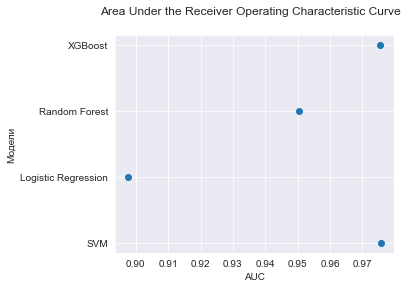

In [149]:
data = { 'SVM': search_param_SVC.best_score_,  'Logistic Regression': cv_log.best_score_, 'Random Forest': grid_rfr.best_score_, 'XGBoost': clf_xgbc_best.best_score_}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, figsize=(5, 4), sharey=True)
axs.scatter(values, names)
fig.suptitle('Area Under the Receiver Operating Characteristic Curve')
axs.set_ylabel('Модели')
axs.set_xlabel('AUC')
axs.yaxis.grid(True)
axs.xaxis.grid(True)

Видно, что площадь максимальна для моделей SVM и XGBoost, что говорит о высоком качестве классификации и способности предсказания моделей.

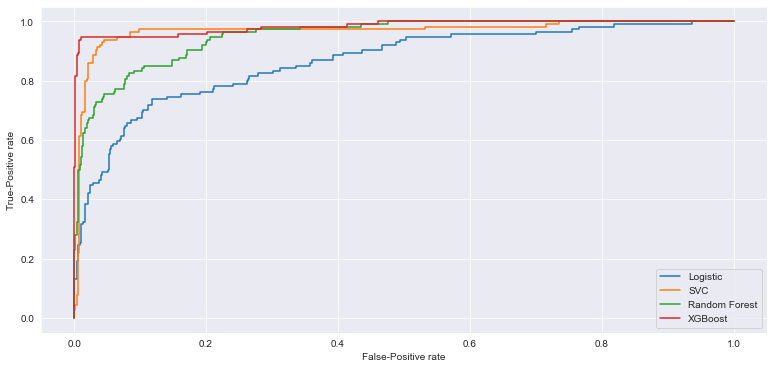

In [146]:
from sklearn.metrics import roc_curve

fig, ax = plt.subplots()
fig.set_size_inches(13,6)

pred_proba_log = cv_log.predict_proba(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, pred_proba_log[:,1].ravel())
plt.plot(fpr_log, tpr_log, label='Logistic')
pred_proba_svm = svm_grid.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, np.ravel(pred_proba_svm))
plt.plot(fpr_svm, tpr_svm, label='SVC')
pred_proba_rfr = grid_rfr.predict_proba(X_test)
fpr_rfr, tpr_rfr, _ = roc_curve(y_test, pred_proba_rfr[:,1].ravel())
plt.plot(fpr_rfr, tpr_rfr, label='Random Forest')
pred_proba_xgb = clf_xgbc_best.predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_proba_xgb[:,1].ravel())
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

plt.xlabel('False-Positive rate')
plt.ylabel('True-Positive rate')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve для XGBoost: AP=0.91')

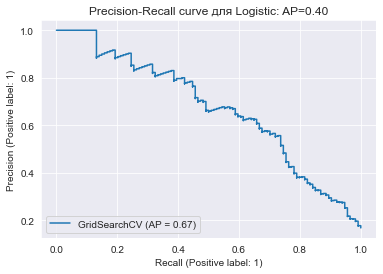

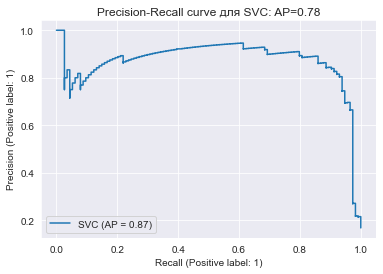

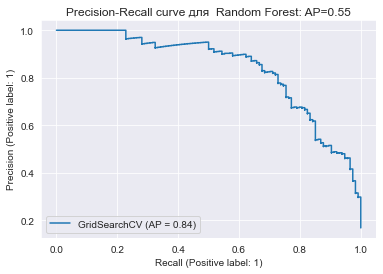

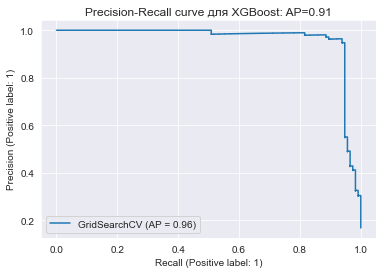

In [153]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision_log = average_precision_score(y_test, logit_pred_best)
disp = plot_precision_recall_curve(cv_log, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve для Logistic: '
                   'AP={0:0.2f}'.format(average_precision_log))

average_precision_svc= average_precision_score(y_test, svm_pred)
disp = plot_precision_recall_curve(svm_grid, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve для SVC: '
                   'AP={0:0.2f}'.format(average_precision_svc))

average_precision_rfr = average_precision_score(y_test, rfr_pred)
disp = plot_precision_recall_curve(grid_rfr, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve для  Random Forest: '
                   'AP={0:0.2f}'.format(average_precision_rfr))

average_precision_xgb = average_precision_score(y_test,xgbc_pred_best)
disp = plot_precision_recall_curve(clf_xgbc_best, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve для XGBoost: '
                   'AP={0:0.2f}'.format(average_precision_xgb))


Кривая precision-recall показывает компромисс между precision и recall для различных пороговых значений. Большая площадь под кривой означает как высокую точность, так и высокую отзывчивость, где высокая точность связана с низкой частотой ложных срабатываний, а высокая отзывчивость - с низкой частотой ложных отрицаний. 

Таким образом, **XGBoost** является лучшей моделью с высокой предсказательной способностью.

In [154]:
print(confusion_matrix(y_test, xgbc_pred_best))

[[560   6]
 [  6 108]]


Модель совершила только 12 ошибок в предсказании, правильно определив 108 пользователей с флагом оттока из 114 на тестовой выборке.